In [1]:
# Extract the stored EETs phrases, their toweet indexes and their embeddings

import joblib
entities=joblib.load( "entities.joblib")
events=joblib.load( "events.joblib")
topics=joblib.load( "topics.joblib")

original_indexes_entities=joblib.load( "original_indexes_entities.joblib")
original_indexes_events=joblib.load( "original_indexes_events.joblib")
original_indexes_topics=joblib.load( "original_indexes_topics.joblib")


entity_embeddings=joblib.load( "entity_embeddings.joblib")
event_embeddings=joblib.load( "event_embeddings.joblib")
topic_embeddings=joblib.load( "topic_embeddings.joblib")

# Find number of tweets belonging to each EETs phrases

entities_count={}
value=[]
for i in original_indexes_entities.keys():
    entities_count[i]=len(original_indexes_entities[i])


events_count={}
value=[]
count=0
for i in original_indexes_events.keys():
    events_count[i]=len(original_indexes_events[i])
    count+=1
print(count)


topics_count={}
value=[]
for i in original_indexes_topics.keys():
    topics_count[i]=len(original_indexes_topics[i])

124404


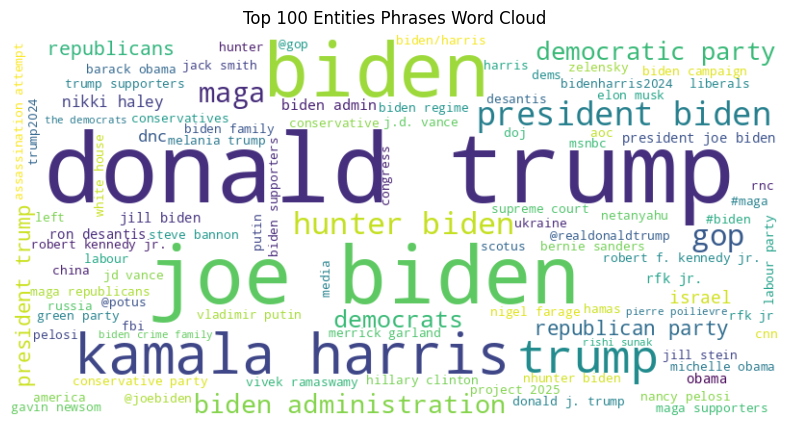

In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Extract the top 100 most frequent entities phrases and their counts
top_entity_dict = dict(list(entities_count.items())[:100])

# Convert to dictionary for word cloud
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_entity_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Top 100 Entities Phrases Word Cloud")
plt.savefig('entity_cloudplot.png')


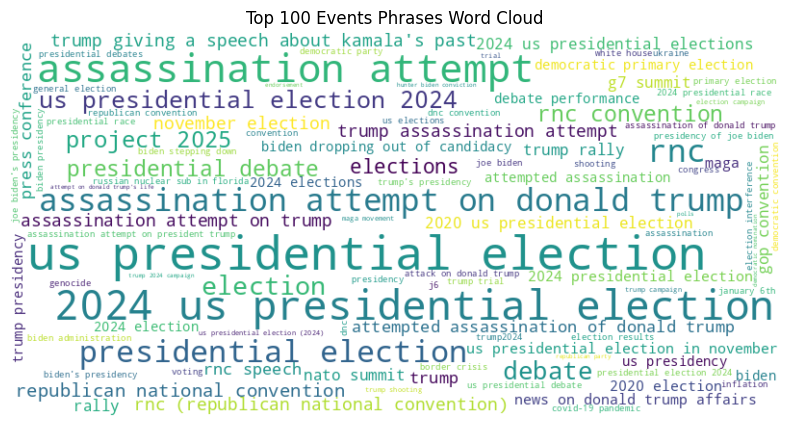

In [3]:


# Extract the top 100 most frequent events phrases phrases and their counts
top_events = events["subject"].value_counts()[0:100]

# Convert to dictionary for word cloud
top_event_dict = dict(list(events_count.items())[:100])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_event_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Top 100 Events Phrases Word Cloud")
plt.savefig('event_cloudplot.png')


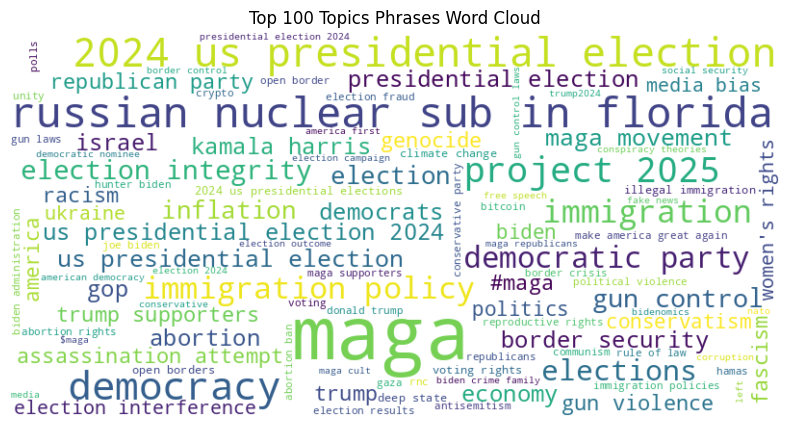

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Extract the top 100 most frequent topics phrases and their counts
top_topics = topics["subject"].value_counts()[0:100]

# Convert to dictionary for word cloud
top_topic_dict = dict(list(topics_count.items())[:100])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_topic_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title("Top 100 Topics Phrases Word Cloud")
plt.savefig('topic_cloudplot.png')


              entity  count
0       donald trump  78284
1          joe biden  52512
2              biden  45763
3      kamala harris  22258
4              trump  15475
...              ...    ...
63420     𝕏 (tiktok)      1
63421       𝗣𝗮𝘁 𝗥𝗼𝗼𝘀      1
63422             🇦🇫      1
63423             🇺🇸      1
63424        🤝voters      1

[63425 rows x 2 columns]
   index          names  count  cluster
0      0   donald trump  78284        5
1      1      joe biden  52512      124
2      2          biden  45763      124
3      3  kamala harris  22258      111
4      4          trump  15475       98


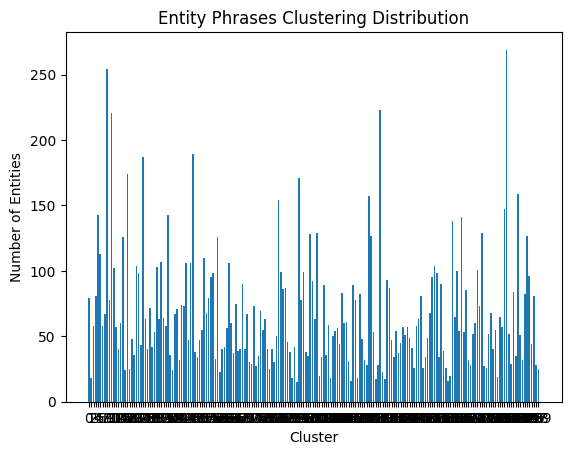

In [5]:
#cluster creation using K-means clustering algorithm of embeddings for entities

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
entities_count_df = pd.DataFrame(list(entities_count.items()), columns=["entity", "count"])
print(entities_count_df)
# Convert embeddings to DataFrame with original index
entities_count_df_part=entities_count_df[entities_count_df["count"]>1]
total_entities=(len(entities_count_df_part.index))
# Function to find optimal number of clusters using Silhouette Score
def find_optimal_clusters(embeddings, max_k=10):
    best_score = -1
    optimal_k = 2

    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(embeddings)
        score = silhouette_score(embeddings, cluster_labels)
        
        if score > best_score:
            best_score = score
            optimal_k = k

    return optimal_k

# manually selected number of clusters
optimal_k= 200
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
entity_cluster_labels = kmeans.fit_predict(entity_embeddings[:total_entities])

# Preserve index,name, count with cluster labels
clustered_entities = pd.DataFrame({
    "index": entities_count_df_part.index,
    "names": entities_count_df_part["entity"],
    "count": entities_count_df_part["count"],
    "cluster": entity_cluster_labels
})

print(clustered_entities.head())
joblib.dump(clustered_entities, "clustered_entities.joblib")

# Visualize Cluster Distribution
plt.hist(entity_cluster_labels, bins=range(optimal_k + 1), align='left', rwidth=0.7)
plt.xlabel("Cluster")
plt.ylabel("Number of Entities")
plt.title("Entity Phrases Clustering Distribution")
plt.xticks(range(optimal_k))
plt.savefig('entity_clusters.png')


grouped_clustered_entities = clustered_entities.groupby('cluster')



   index                                  names  count  cluster
0      0               us presidential election   3859       54
1      1          2024 us presidential election   2932      116
2      2                  assassination attempt   2620      125
3      3  assassination attempt on donald trump   1778      198
4      4                                    rnc   1746      134


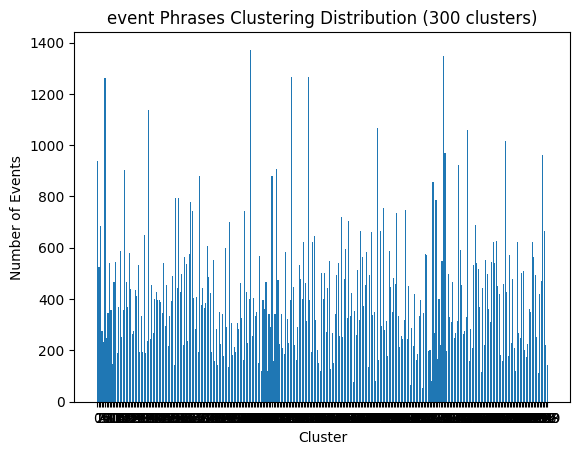

In [6]:
#cluster creation using K-means clustering algorithm of embeddings for events

events_count_df = pd.DataFrame(list(events_count.items()), columns=["entity", "count"])
events_count_df_part=events_count_df[events_count_df["count"]>1]
total_events=(len(events_count_df_part.index))

optimal_k= 300
# Fit KMeans using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
event_cluster_labels = kmeans.fit_predict(event_embeddings)


# Preserve index with cluster labels
clustered_events = pd.DataFrame({
    "index": events_count_df.index,
    "names": events_count_df["entity"],
    "count": events_count_df["count"],
    "cluster": event_cluster_labels
})


print(clustered_events.head())
joblib.dump(clustered_events, "clustered_Events.joblib")

# Visualize Cluster Distribution
plt.hist(event_cluster_labels, bins=range(optimal_k + 1), align='left', rwidth=0.7)
plt.xlabel("Cluster")
plt.ylabel("Number of Events")
plt.title("event Phrases Clustering Distribution (300 clusters)")
plt.xticks(range(optimal_k))
plt.savefig('event_clusters.png')


grouped_clustered_events = clustered_events.groupby('cluster')

    index                           names  count  cluster
0       0                            maga   1836      100
1       1  russian nuclear sub in florida    739      142
2       2   2024 us presidential election    669        1
3       3                       democracy    622       12
4       4                    project 2025    508       77
..    ...                             ...    ...      ...
95     95                  border control     62       62
96     96                      corruption     62       18
97     97               election campaign     62      151
98     98                       trump2024     62       15
99     99                election outcome     61      133

[100 rows x 4 columns]


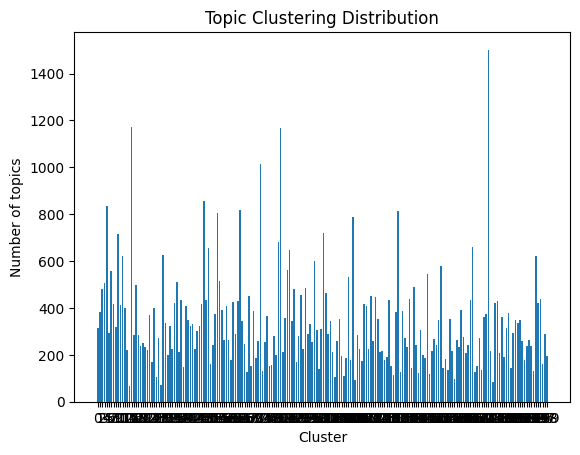

In [7]:
#cluster creation using K-means clustering algorithm of embeddings for entities
topics_count_df = pd.DataFrame(list(topics_count.items()), columns=["entity", "count"])
topics_count_df_part=topics_count_df[topics_count_df["count"]>1]
total_topics=(len(topics_count_df_part.index))

optimal_k= 200
# Fit KMeans using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
topic_cluster_labels = kmeans.fit_predict(topic_embeddings)


# Preserve index with cluster labels
clustered_topics = pd.DataFrame({
    "index": topics_count_df.index,
    "names": topics_count_df["entity"],
    "count": topics_count_df["count"],
    "cluster": topic_cluster_labels
})

print(clustered_topics.head(100))
joblib.dump(clustered_topics, "clustered_Entities.joblib")

# Visualize Cluster Distribution
plt.hist(topic_cluster_labels, bins=range(optimal_k + 1), align='left', rwidth=0.7)
plt.xlabel("Cluster")
plt.ylabel("Number of topics")
plt.title("Topic Clustering Distribution")
plt.xticks(range(optimal_k))
plt.savefig('topic_clusters.png')


grouped_clustered_topics = clustered_topics.groupby('cluster')

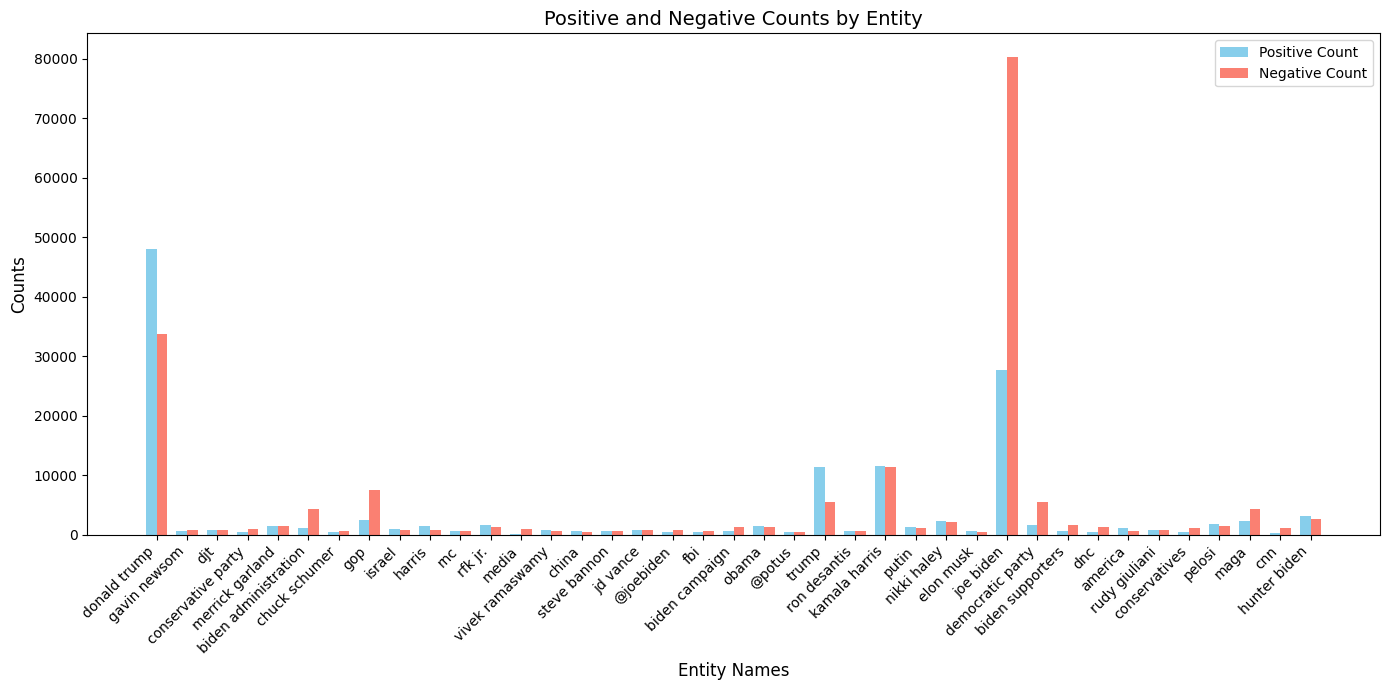

In [8]:
# Stance distribution for entities
negative_count=[]
positive_count=[]
dict_stance_entities={

    "entity_name": [],
    "positive_count": [],
    "negative_count": []
}
# calculate count of positive and negative tweets belonging to each entity cluster
for cluster_label, group in grouped_clustered_entities:
        neg=0
        pos=0
        for index, row in group.iterrows():
            list_of_indexes=original_indexes_entities[row["names"]]
            for i in list_of_indexes:
                stance=entities.loc[i, "subject_stance"]
                if stance=="nonsupportive" or stance=="negative":
                    neg+=1
                else:
                    pos+=1
        if (neg+pos)> 1000:    #keeping threshold of 100 for considering entity cluster significant
            dict_stance_entities["entity_name"].append(group.iloc[0]["names"])
            dict_stance_entities["positive_count"].append(pos)
            dict_stance_entities["negative_count"].append(neg)
            
        negative_count.append(neg)
        positive_count.append(pos)
        


import matplotlib.pyplot as plt
import numpy as np

# Extract data from dict_stance_entities
entities_names = dict_stance_entities["entity_name"]
positive_counts = dict_stance_entities["positive_count"]
negative_counts = dict_stance_entities["negative_count"]

# Set up bar plot parameters
x = np.arange(len(entities_names))  # X locations for the groups
width = 0.35  # Bar width

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot bars for positive and negative counts
bar1 = ax.bar(x - width/2, positive_counts, width, label='Positive Count', color='skyblue')
bar2 = ax.bar(x + width/2, negative_counts, width, label='Negative Count', color='salmon')

# Add labels and titles
ax.set_xlabel('Entity Names', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Positive and Negative Counts by Entity', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(entities_names, rotation=45, ha="right", fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig('entity_stance.png')



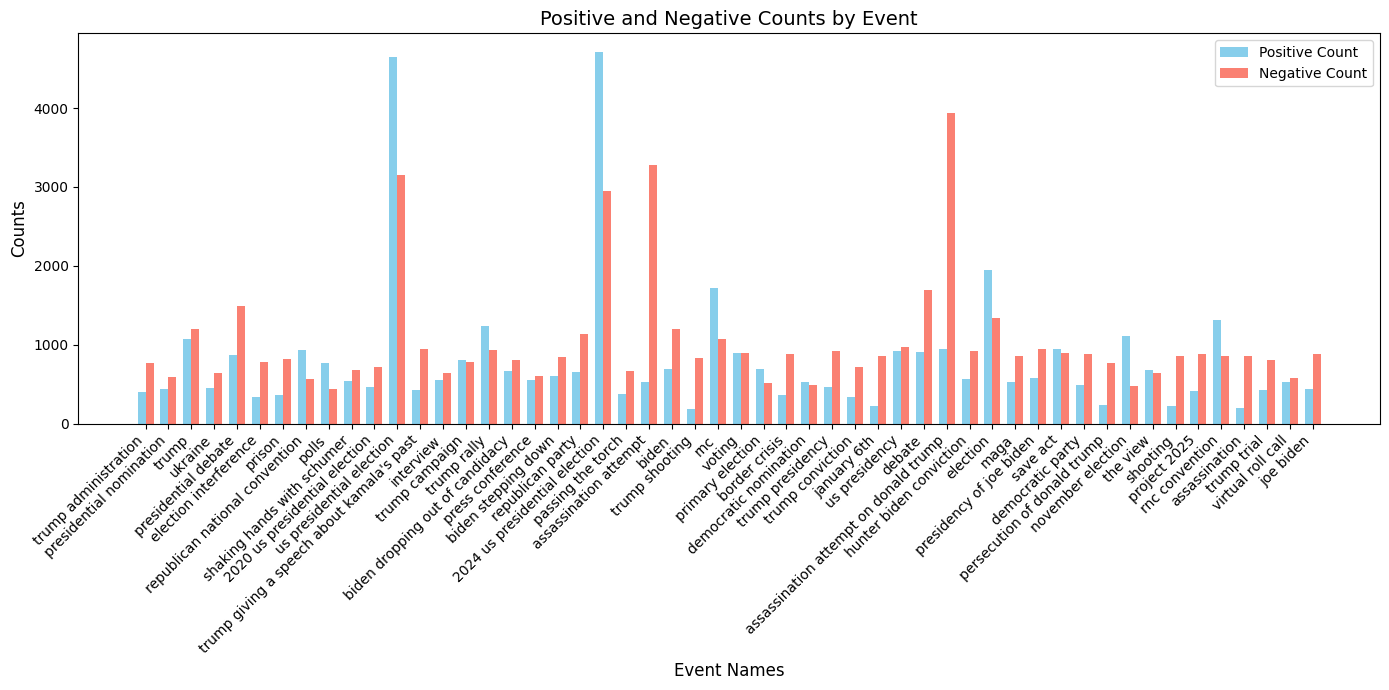

In [9]:
# Stance distribution for entities

negative_count=[]
positive_count=[]
dict_stance_events={

    "event_name": [],
    "positive_count": [],
    "negative_count": []
}

# calculate count of positive and negative tweets belonging to each entity cluster

for cluster_label, group in grouped_clustered_events:
        neg=0
        pos=0
        for index, row in group.iterrows():
            list_of_indexes=original_indexes_events[row["names"]]
            for i in list_of_indexes:
                stance=events.loc[i, "subject_stance"]
                if stance=="nonsupportive" or stance=="negative":
                    neg+=1
                else:
                    pos+=1
        if (neg+pos)> 1000:     #keeping threshold of 100 for considering event cluster significant
            dict_stance_events["event_name"].append(group.iloc[0]["names"])
            dict_stance_events["positive_count"].append(pos)
            dict_stance_events["negative_count"].append(neg)
            
        negative_count.append(neg)
        positive_count.append(pos)
    

import matplotlib.pyplot as plt
import numpy as np

# Extract data from dict_stance_events
events_names = dict_stance_events["event_name"]
positive_counts = dict_stance_events["positive_count"]
negative_counts = dict_stance_events["negative_count"]

# Set up bar plot parameters
x = np.arange(len(events_names))  # X locations for the groups
width = 0.35  # Bar width

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot bars for positive and negative counts
bar1 = ax.bar(x - width/2, positive_counts, width, label='Positive Count', color='skyblue')
bar2 = ax.bar(x + width/2, negative_counts, width, label='Negative Count', color='salmon')

# Add labels and titles
ax.set_xlabel('Event Names', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Positive and Negative Counts by Event', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(events_names, rotation=45, ha="right", fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig('event_stance.png')



In [ ]:
import json
import ollama
import re
#ollama request for summary using llama3.2 model
def ollama_response(model_name, system_message, user_message):
    response=ollama.chat(
    model=model_name,
    messages=[ {"role":"system", "content": system_message}, {"role": "user", "content": user_message},],)
    response=response["message"]["content"]
    return response  
# preprocess tweets before giving for summarization
def preprocess_tweet(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove extra spaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

system_message=f"""
You are a political tweet text expert analyst. You will be give a topic and stance tweets towards topic. create concise, informative, insightful short 6-7 line paragraph summary of tweets highlighting variety of opinions. 
Output format:  
Just give summary in the output without any extra information. 
"""  
#use ollama model to create summaries
def tweet_summary_creation(tweets,model_name):
    user_message= "\n Tweets: \n"+tweets
    response=ollama_response(model_name, system_message, user_message)   
    return response

#variable initialization
negative_count=[]
positive_count=[]
dict_stance_topics={

    "topic_name": [],
    "positive_count": [],
    "negative_count": [],
    "positive_summary": [],
    "negative_summary": []
}
model_name="llama3.2"

# calculate count of positive and negative tweets belonging to each entity cluster
for cluster_label, group in grouped_clustered_topics:
        neg=0
        pos=0
        positive_tweet_list=""
        negative_tweet_list=""
        for index, row in group.iterrows():
            #print(row)
            list_of_indexes=original_indexes_topics[row["names"]]
            for i in list_of_indexes:
                stance=topics.loc[i, "subject_stance"]
                if stance=="nonsupportive" or stance=="negative":
                    neg+=1
                    negative_tweet_list+="\n"+topics.loc[i, "tweet_text"]
                else:
                    pos+=1
                    positive_tweet_list+="\n"+topics.loc[i, "tweet_text"]
        if (neg+pos)> 1000:   #keeping threshold of 100 for considering topic cluster significant
            dict_stance_topics["topic_name"].append(group.iloc[0]["names"])
            dict_stance_topics["positive_count"].append(pos)
            dict_stance_topics["negative_count"].append(neg)
            #tweet summary creation for both positive and negative topics
            positive_summary=tweet_summary_creation(positive_tweet_list,model_name)
            negative_summary=tweet_summary_creation(negative_tweet_list,model_name)
            dict_stance_topics["positive_summary"].append(positive_summary)
            dict_stance_topics["negative_summary"].append(negative_summary)            
        negative_count.append(neg)
        positive_count.append(pos)
        
#storing tweets summary and positive ane negative stance tweet counts
dict_stance_topics_op = pd.DataFrame.from_dict(dict_stance_topics)
dict_stance_topics_op.to_csv("dict_stance_topics.csv")


import matplotlib.pyplot as plt
import numpy as np

# Extract data from dict_stance_topics
topics_names = dict_stance_topics["topic_name"]
positive_counts = dict_stance_topics["positive_count"]
negative_counts = dict_stance_topics["negative_count"]

# Set up bar plot parameters
x = np.arange(len(topics_names))  # X locations for the groups
width = 0.35  # Bar width

# Create the figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# Plot bars for positive and negative counts
bar1 = ax.bar(x - width/2, positive_counts, width, label='Positive Count', color='skyblue')
bar2 = ax.bar(x + width/2, negative_counts, width, label='Negative Count', color='salmon')

# Add labels and titles
ax.set_xlabel('topic Names', fontsize=12)
ax.set_ylabel('Counts', fontsize=12)
ax.set_title('Positive and Negative Counts by topic', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(topics_names, rotation=45, ha="right", fontsize=10)
ax.legend()

# Show plot
plt.tight_layout()
plt.savefig('topic_stance.png')
